In [1]:
import preprocessing_pipeline as pp
import mne

In [2]:
path = r"I:\Science\CIS-YASHMOSH\niallmcguire\dominika\Raw Data\001\001.cnt"

In [3]:
raw = pp.load_eeg_data(path, eeg_format="cnt", use_montage_creator=True, montage_type='standard_1020')

Reading 0 ... 3507399  =      0.000 ...  7014.798 secs...


C:\Users\gxb18167\PycharmProjects\SIGIR_EEG_GAN\Development\Information-Need\Data\preprocessing_pipeline.py:137: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(file, preload=preload)
C:\Users\gxb18167\PycharmProjects\SIGIR_EEG_GAN\Development\Information-Need\Data\preprocessing_pipeline.py:53: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['A1', 'A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  self.raw.set_montage(montage)


In [20]:
raw

<RawCNT | 001.cnt, 41 x 3507400 (7014.8 s), ~1.07 GB, data loaded>

In [4]:
raw = pp.add_stimulus_to_raw(raw)

Creating RawArray with float64 data, n_channels=1, n_times=3507400
    Range : 0 ... 3507399 =      0.000 ...  7014.798 secs
Ready.


In [15]:
start_index, end_index = raw.time_as_index([0, 1])

In [14]:
raw._data.shape

(41, 3507400)

In [16]:
segment_data = raw._data[:, start_index:end_index]

In [19]:
segment_data

array([[-8.72110117e-06, -1.22346383e-05, -4.70563013e-06, ...,
        -1.25483470e-06, -1.71912354e-05,  6.27417350e-08],
       [-6.27417350e-08, -6.27417350e-08, -6.27417350e-08, ...,
        -6.27417350e-08, -6.27417350e-08,  0.00000000e+00],
       [-3.01160328e-06, -1.65010763e-05, -9.03480984e-06, ...,
        -9.53674372e-06,  1.33012478e-05, -1.00386776e-05],
       ...,
       [-1.09170619e-05, -1.66893015e-05, -1.12935123e-05, ...,
        -6.96433259e-06, -4.89385533e-06, -7.77997514e-06],
       [-6.27417350e-08, -6.27417350e-08, -6.27417350e-08, ...,
        -6.27417350e-08, -6.27417350e-08, -6.27417350e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [5]:
events = mne.find_events(raw, stim_channel='STI')

1839 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  39  44  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 173 174 175]


In [6]:
events = mne.pick_events(events)
#first column is onset of ID
#third column is ID itself
events

array([[   2843,       0,     117],
       [   4333,       0,      21],
       [   5133,       0,      22],
       ...,
       [3496631,       0,       4],
       [3497705,       0,      13],
       [3498519,       0,       8]], dtype=int64)

In [35]:
event_ids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

labels = {
    '1': 'I know',
    '2': 'FOK',
    '3': 'I do not know',
    '4': 'correct answer choice',
    '5': 'incorrect answer choice',
    '6': 'I do not know (answer choice)',
    '7': 'low confidence',
    '8': 'high confidence',
    '9': 'I want to know',
    '10': 'I do not want to know'
}


level_mapping = {
    'KNOW': ['1'],
    'FOK': ['2'],
    'NKNOW': ['3'],
    'MR-C': ['4'],
    'MR-I': ['5'],
    'MR-N': ['6'],
    'CJ-Low': ['7'],
    'CJ-High': ['8'],
    'SD-SEARCH': ['9'],
    'SD-NOSEARCH': ['10']
}

In [36]:
all_events = [event for sublist in level_mapping.values() for event in sublist]

C:\Users\gxb18167\AppData\Local\Temp\ipykernel_22600\2939864765.py:1: RuntimeWarning: event 1 missing from event_id will be ignored
  fig = mne.viz.plot_events(
C:\Users\gxb18167\AppData\Local\Temp\ipykernel_22600\2939864765.py:1: RuntimeWarning: event 2 missing from event_id will be ignored
  fig = mne.viz.plot_events(
C:\Users\gxb18167\AppData\Local\Temp\ipykernel_22600\2939864765.py:1: RuntimeWarning: event 3 missing from event_id will be ignored
  fig = mne.viz.plot_events(
C:\Users\gxb18167\AppData\Local\Temp\ipykernel_22600\2939864765.py:1: RuntimeWarning: event 4 missing from event_id will be ignored
  fig = mne.viz.plot_events(
C:\Users\gxb18167\AppData\Local\Temp\ipykernel_22600\2939864765.py:1: RuntimeWarning: event 5 missing from event_id will be ignored
  fig = mne.viz.plot_events(
C:\Users\gxb18167\AppData\Local\Temp\ipykernel_22600\2939864765.py:1: RuntimeWarning: event 6 missing from event_id will be ignored
  fig = mne.viz.plot_events(
C:\Users\gxb18167\AppData\Local\Te

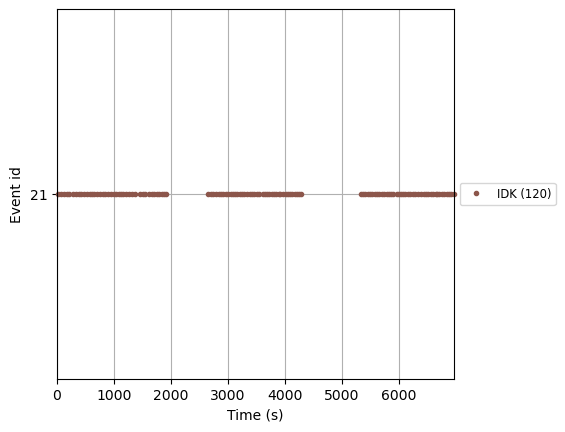

In [41]:
fig = mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp, event_id={"IDK": 21}
)